# 최적화 기초

- 최적화 문제
$$ x^* = \arg\max_xf(x) $$또는
$$ x^* = \arg\min_xf(x)$$

Font 'default' does not have a glyph for '\ucc28' [U+cc28], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\uc6d0' [U+c6d0], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\ub85c' [U+b85c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\uc820' [U+c820], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\ube0c' [U+be0c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\ub85d' [U+b85d], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\ud568' [U+d568], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\uc218' [U+c218], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\ucc28' [U+cc28], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\uc6d0' [U+c6d0], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\ub85c' [U+b85c], 

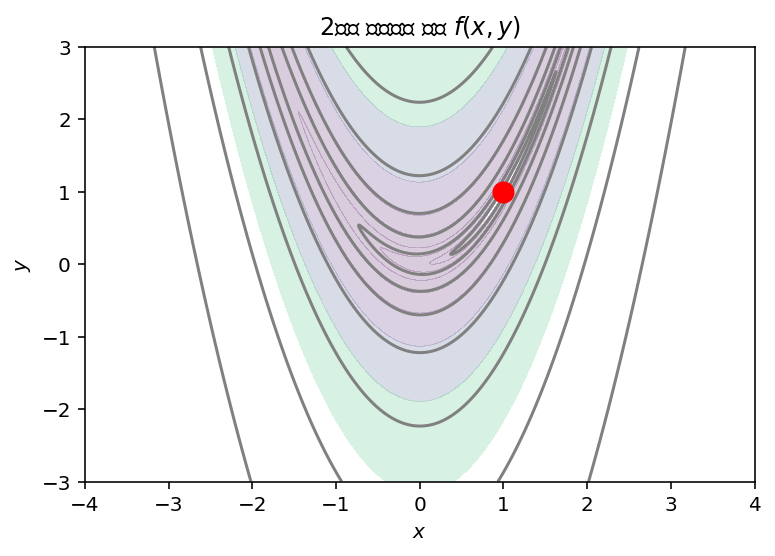

In [1]:
def f2(x, y):
    return (1 - x)**2 + 100.0 * (y - x**2)**2

xx = np.linspace(-4, 4, 800)
yy = np.linspace(-3, 3, 600)
X, Y = np.meshgrid(xx, yy)
Z = f2(X, Y)

levels=np.logspace(-1, 3, 10)
plt.contourf(X, Y, Z, alpha=0.2, levels=levels)
plt.contour(X, Y, Z, colors="gray",
            levels=[0.4, 3, 15, 50, 150, 500, 1500, 5000])
plt.plot(1, 1, 'ro', markersize=10)

plt.xlim(-4, 4)
plt.ylim(-3, 3)
plt.xticks(np.linspace(-4, 4, 9))
plt.yticks(np.linspace(-3, 3, 7))
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.title("2차원 로젠브록 함수 $f(x,y)$")
plt.show()

### 그리드서치와 수치의 최적화

**알고리즘에서 그리드 서치**
- 알고리즘 탐색방법중 하나 많은 계산을 감수하고 모든 방향으로 탐색 예(2중for문 탐색)
- 지금위치($x_k$)가 최적점인지 판단하는 함수
- 어떤위치($x_k$)를 시도한뒤, 다음위치($x_k$)을 찾는 알고리즘

- 기울기 필요조건
    - $x^*$가 최소점일려면 $x^*$의 기울기와 도함수$\frac{d}{dx}f값이 0이라는 조건을 만족해야 한다$
    - 다변수 함수인 경우 모든 변수에 대한 편미분값이 0 이여야 한다
    $$ \nabla f = 0$$
    - 이때 그레디언트 벡터 $\nabla f$를 g라는 기호로도 나타난다
    $$ g = 0 $$
- 여기서 필요조건인 이유는 모든 기울기가 0일경우 최소점은 아니지만 모든 최소점은 기울기가 0이기 때문이다
- 여기서 극점을 찾으면 최소 최고일 수 있으므로 이후 2차 도함수를 계산하여 양수이면 최소점 음수이면 최대점이다

# 최대 경사법

- 현제 위치 $x_k$에서의 기울기 값 $g(x_k)$만을 이용하여 다음번 위치 $x_{k+1}$를 결정하는 방법이다
$$ x_{k+1} = x_k - \mu\nabla f(x_k) = x_k - \mu g(x_k) $$
    - $\mu$는 스텝사이즈 라고 하고 $g(x_k) = 0$일때 그만한다

1차 시도: x_1 = 0.00, g_1 = -4.00
2차 시도: x_2 = 1.60, g_2 = -0.80
3차 시도: x_3 = 1.92, g_3 = -0.16


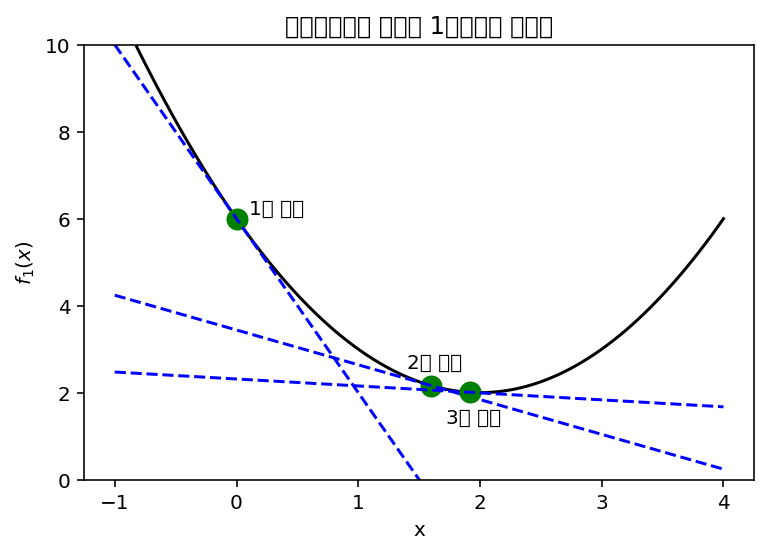

In [4]:
def f1(x):
    return (x - 2) ** 2 + 2

def f1d(x):
    """f1(x)의 도함수"""
    return 2 * (x - 2.0)
xx = np.linspace(-1, 4, 100)

plt.plot(xx, f1(xx), 'k-')

# step size
mu = 0.4

# k = 0
x = 0
plt.plot(x, f1(x), 'go', markersize=10)
plt.text(x + 0.1, f1(x) + 0.1, "1차 시도")
plt.plot(xx, f1d(x) * (xx - x) + f1(x), 'b--')
print("1차 시도: x_1 = {:.2f}, g_1 = {:.2f}".format(x, f1d(x)))

# k = 1
x = x - mu * f1d(x)
plt.plot(x, f1(x), 'go', markersize=10)
plt.text(x - 0.2, f1(x) + 0.4, "2차 시도")
plt.plot(xx, f1d(x) * (xx - x) + f1(x), 'b--')
print("2차 시도: x_2 = {:.2f}, g_2 = {:.2f}".format(x, f1d(x)))

# k = 2
x = x - mu * f1d(x)
plt.plot(x, f1(x), 'go', markersize=10)
plt.text(x - 0.2, f1(x) - 0.7, "3차 시도")
plt.plot(xx, f1d(x) * (xx - x) + f1(x), 'b--')
print("3차 시도: x_3 = {:.2f}, g_3 = {:.2f}".format(x, f1d(x)))

plt.xlabel("x")
plt.ylabel("$f_1(x)$")
plt.title("최대경사법을 사용한 1차함수의 최적화")
plt.ylim(0, 10)
plt.show()

### 문제점
1. 스텝 사이즈가 클경우
    - 스텝이 너무 클경우 최적점과의 거리가 더 멀어질 수 있다
2. 스텝이 너무 작을경우
    - 계곡일 경우 진동현상이 발생할 수 있다.
3. 전역 최적화 문제
    - 최고점을 찾고 그만두지만 더 높은 최적점이 존제할 수 있다

### 2차 도함수를 사용한 뉴턴방법
- 뉴턴방법(Newton's method)
$$ x_{k+1} = x_n - [Hf(x_n)]^{-1}\nabla f(x_n)$$
    - 함수일 경우
    $$ x_{k+1} = x_n - \frac{f'(x_n)}{f''(x_n)} $$

#### 준 뉴턴 방법
- 뉴턴 방법은 빠르게 수렴할 수 있다는 장점이 있지만 헤시안 행렬을 사람이 미리 구해야 하고 함수 모양에 따라 잘 수렴하지 않을 수 있다. 준 뉴턴 방법은 사람이 직접 구하는 헤시안 행렬함수 대신 현재 시도하고 있는 $x_n$주변 몇몇점에서 함수값을 구하고 이를 이용하여 2차 도함수의 근사값 혹은 이에 상응하는 정보를 수치적으로 계산한다

# 전역 최적화 문제

- 수치적 최적화 방법의 단점으로 복수의 국소 최저점(local minima)를 가지고 있는 경우 최적화에 실패할 수 있다

      fun: 15.791736781359305
 hess_inv: array([[0.05417541]])
      jac: array([2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 30
      nit: 6
     njev: 10
   status: 0
  success: True
        x: array([5.6792078])


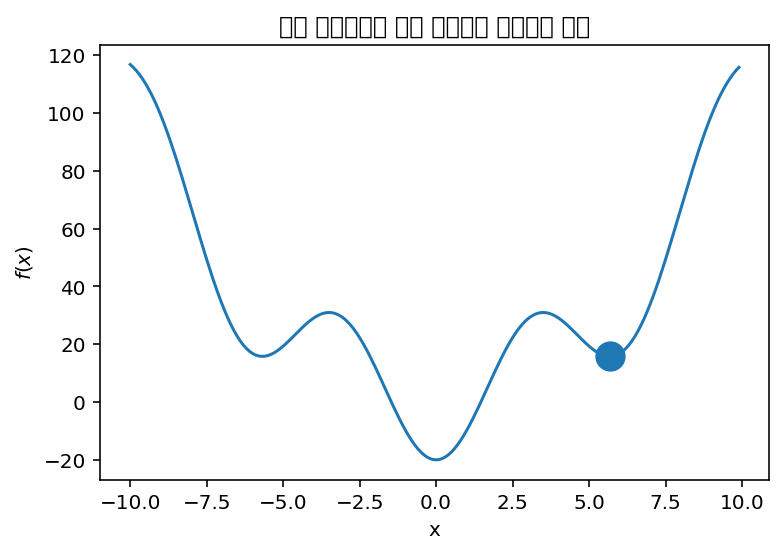

In [7]:
def f_global(x):
    """비선형 목적함수"""
    return x**2 - 20 * np.cos(x)
x = np.arange(-10, 10, 0.1)

result = sp.optimize.minimize(f_global, 4)
print(result)
x_sol = result['x']
x_sol
plt.plot(x, f_global(x));
plt.scatter(x_sol, f_global(x_sol), s=200)
plt.title("전역 최적화에서 국소 최저점에 수렴하는 경우")
plt.ylabel("$f(x)$")
plt.xlabel("x")
plt.show()

### 컨벡스 문제
- 목적함수의 2차 조함수의 값이 항상 0 이상이 되는 영역에서만 정의된 최적화 문제를 컨벡스 문제라고 한다

$$ \frac{\partial}{\partial x^2}f \geq 0 $$
    - 컨벡스 문제에서는 유일한 적역 최적점이 존재한다